ANALYSIS OF FEATURES FROM STRONG AND WEAK

In [ ]:
import pandas as pd

# ===============================
# 0️⃣ Load dataset
# ===============================
csv_path = r"D:\QRMODELTRAINING\backend\CSVFILES\QrusaderFeaturesWhois.csv"
df = pd.read_csv(csv_path)

# ===============================
# 1️⃣ Define lexical and whois features
# ===============================
numeric_features = [
    'url_length', 'subdomain_count', 'path_depth', 'digit_letter_ratio',
    'special_char_ratio', 'repeated_char_count', 'domain_entropy',
    'path_entropy', 'long_subdomain_length', 'query_param_count',
    'vowel_count', 'consonant_count', 'digit_special_ratio',
    'max_path_segment_length', 'domain_age_days', 'expiration_days', 'registration_length', 'ns_count'
]

# Updated binary features
binary_features = [
    'has_ip', 'https_token', 'url_has_suspicious_keywords', 'has_multiple_subdomains', 'domain_age_missing', 'dns_record', 'registrar_known', 'whois_privacy'
]

# ===============================
# 2️⃣ Summary statistics for numeric features
# ===============================
print("=== Numeric Feature Summary ===")
for feature in numeric_features:
    print(f"\nFeature: {feature}")
    print(df.groupby('Label')[feature].describe())

# ===============================
# 3️⃣ Counts for binary features
# ===============================
print("\n=== Binary Feature Counts ===")
for feature in binary_features:
    print(f"\nFeature: {feature}")
    print(pd.crosstab(df[feature], df['Label']))

# ===============================
# 4️⃣ Correlation with Label_encoded
# ===============================
df['Label_encoded'] = df['Label'].map({'benign': 0, 'malicious': 1})

corr_matrix = df[numeric_features + binary_features + ['Label_encoded']].corr()
print("\n=== Correlation with Label_encoded ===")
for feature in numeric_features + binary_features:
    corr = corr_matrix.loc[feature, 'Label_encoded']
    print(f"{feature}: {corr:.3f}")

# ===============================
# 5️⃣ Rank features by absolute correlation
# ===============================
feature_corr_rank = corr_matrix['Label_encoded'].drop('Label_encoded').abs().sort_values(ascending=False)
print("\n=== Features ranked by absolute correlation with Label ===")
print(feature_corr_rank)


=== Numeric Feature Summary ===

Feature: url_length
            count       mean        std   min   25%   50%    75%     max
Label                                                                   
benign     9999.0  76.781178  40.456659  18.0  45.0  64.0  107.0   651.0
malicious  9999.0  87.667367  67.023863  15.0  43.0  72.0  112.0  1382.0

Feature: subdomain_count
            count      mean       std  min  25%  50%  75%   max
Label                                                          
benign     9999.0  1.244724  0.491186  0.0  1.0  1.0  1.0   5.0
malicious  9999.0  0.850285  1.065136  0.0  0.0  1.0  1.0  25.0

Feature: path_depth
            count      mean       std  min  25%  50%  75%   max
Label                                                          
benign     9999.0  2.388839  1.657821  0.0  1.0  2.0  3.0  15.0
malicious  9999.0  2.273127  1.805425  0.0  1.0  2.0  3.0  19.0

Feature: digit_letter_ratio
            count      mean       std  min  25%       50%   75%    

REMOVING WEAK FEATURES

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"D:\QRMODELTRAINING\backend\CSVFILES\QrusaderFeaturesWhois.csv")

# Features to remove (very weak / extremely weak)
remove_features = [
    'url_length', 'whois_privacy', 'has_multiple_subdomains',
    'vowel_count', 'consonant_count', 'path_entropy',
    'path_depth', 'domain_entropy', 'special_char_ratio',
    'long_subdomain_length'
]

# Drop these features
df_final = df.drop(columns=remove_features, errors='ignore')

# Save the cleaned dataset to a new CSV
df_final.to_csv(r"D:\QRMODELTRAINING\CSVFILES\FinalFeatures.csv", index=False)

print("✅ Removed very weak features and saved as FinalFeatures.csv")


✅ Removed very weak features and saved as FinalFeatures.csv


FEATURE ANALYSIS AFTER REMOVING VERY WEAK TO EXTREMELY WEAK FEATURES

In [ ]:
df = pd.read_csv(r"D:\QRMODELTRAINING\backend\CSVFILES\FinalFeatures.csv")

In [4]:
# ===============================
# Updated feature lists after removing very weak/extremely weak
# ===============================

numeric_features = [
    'subdomain_count', 'digit_letter_ratio', 'repeated_char_count',
    'query_param_count', 'digit_special_ratio',
    'max_path_segment_length', 'domain_age_days', 'expiration_days',
    'registration_length', 'ns_count'
]

binary_features = [
    'has_ip', 'https_token', 'url_has_suspicious_keywords',
    'domain_age_missing', 'dns_record', 'registrar_known'
]


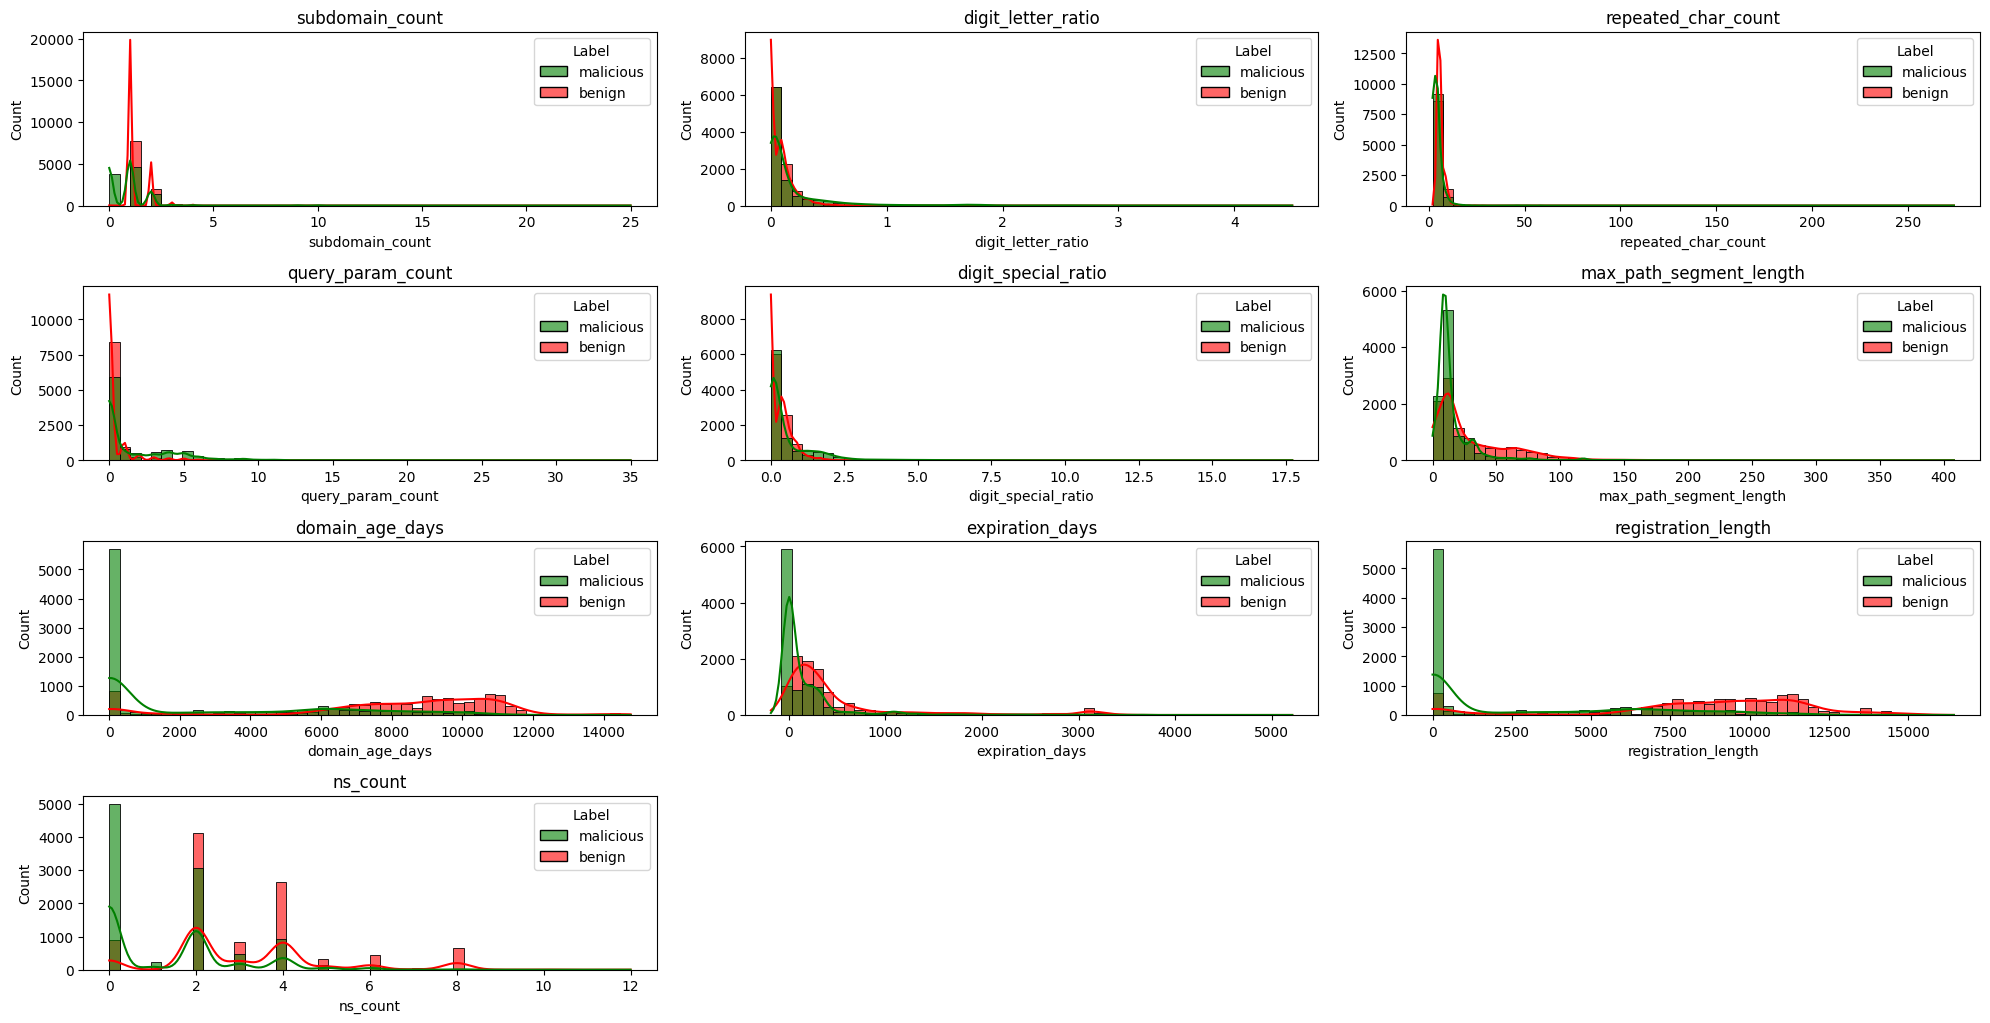

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# Plot numeric features
# ===============================
# ===============================
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(6, 3, i+1)  # 6 rows x 3 cols grid is fine for 17 features
    if df[feature].nunique() > 1:
        sns.histplot(data=df, x=feature, hue='Label', bins=50, kde=True, palette=['green','red'], alpha=0.6)
    else:
        sns.histplot(data=df, x=feature, hue='Label', bins=50, palette=['green','red'])
    plt.title(feature)
plt.tight_layout()
plt.show()

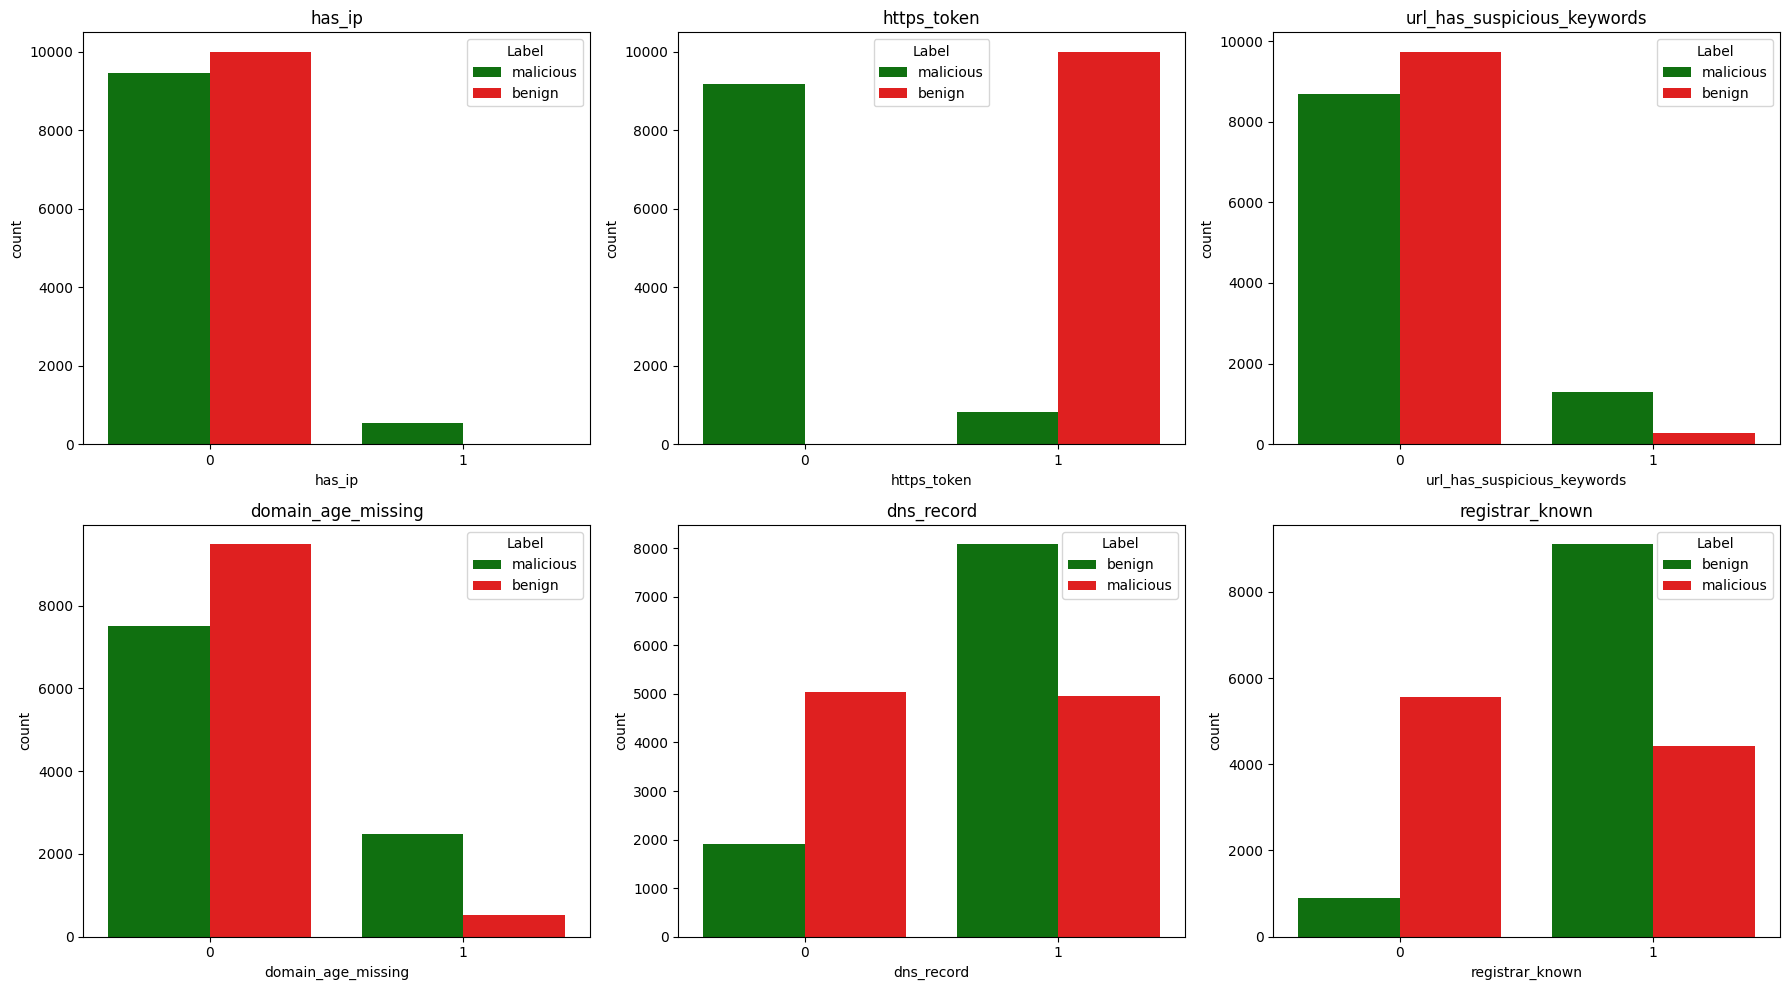

In [6]:
# ===============================
# Plot binary features
# ===============================
n_features = len(binary_features)
n_cols = 3  # how many plots per row
n_rows = (n_features + n_cols - 1) // n_cols  # auto calculate needed rows

plt.figure(figsize=(6 * n_cols, 5 * n_rows))
for i, feature in enumerate(binary_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=feature, hue='Label', data=df, palette=['green','red'])
    plt.title(feature)
plt.tight_layout()
plt.show()


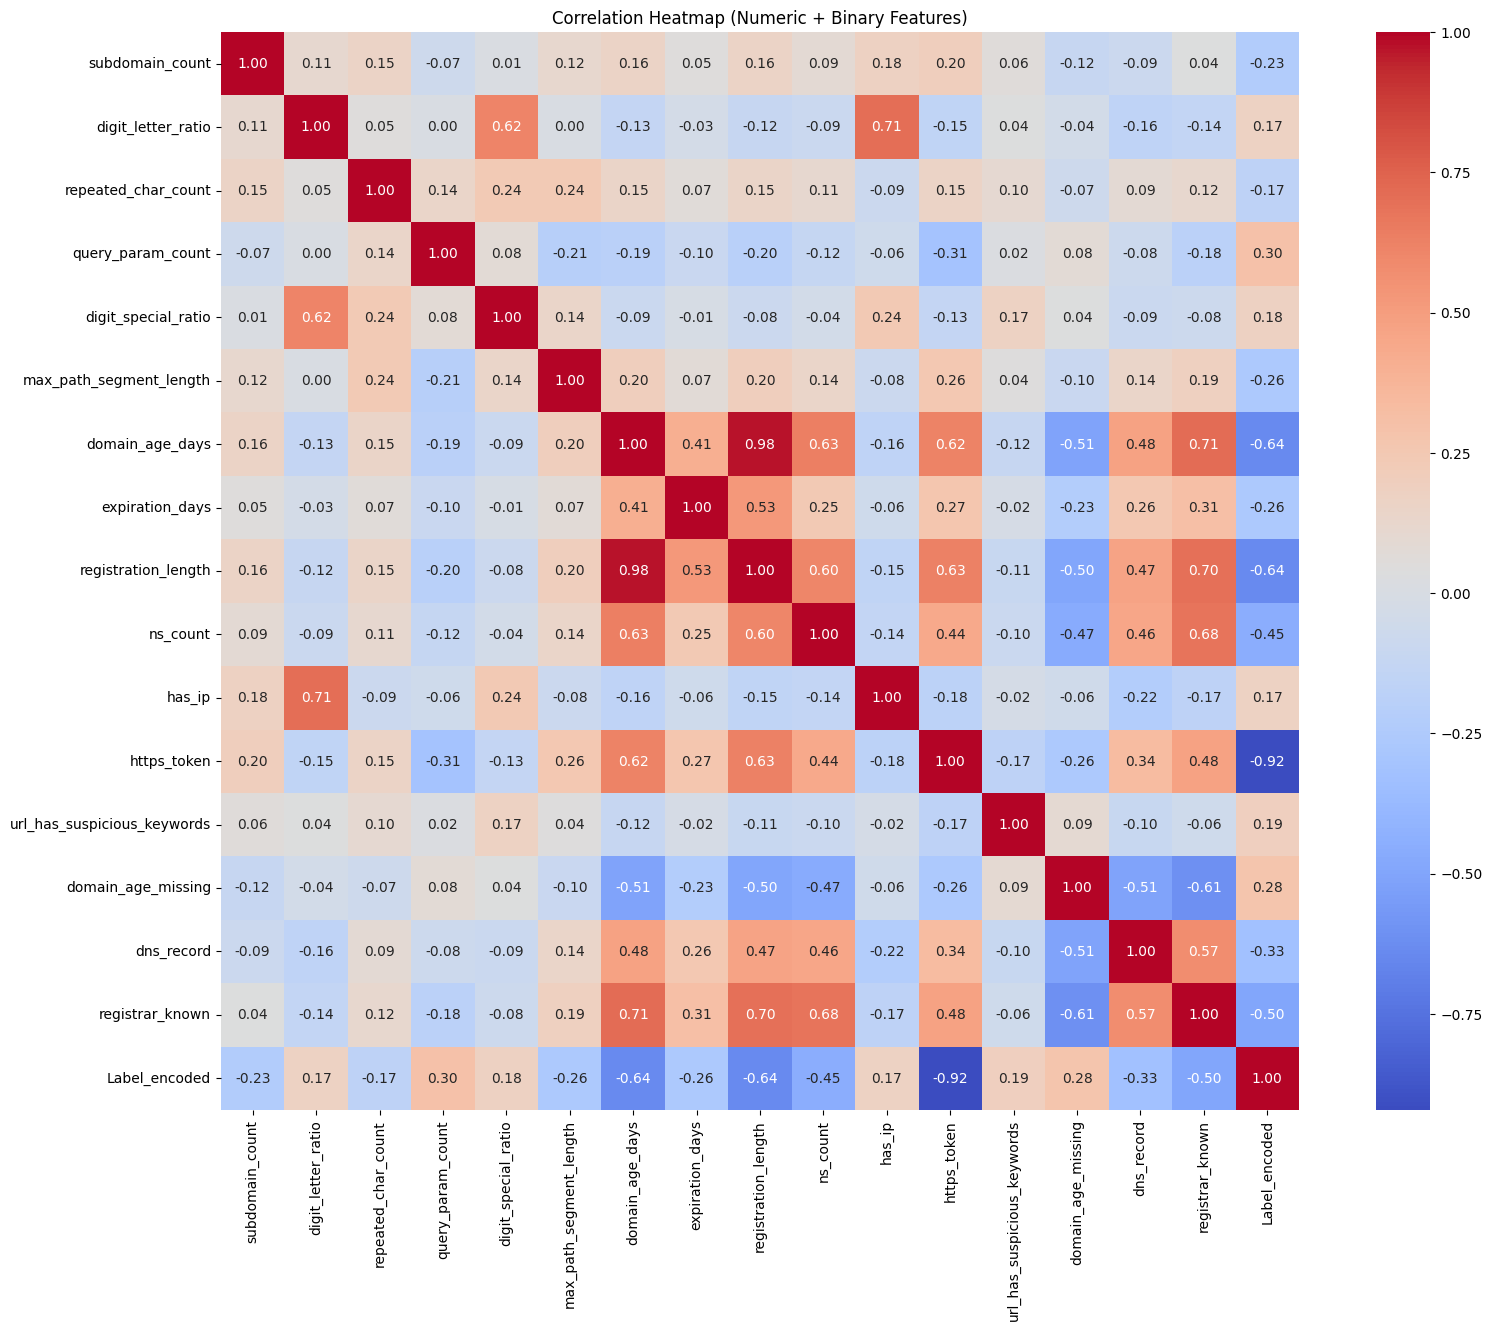

In [7]:
# ===============================
# Correlation heatmap
# ===============================
# Encode labels
df['Label_encoded'] = df['Label'].map({'benign': 0, 'malicious': 1})
plt.figure(figsize=(20, 14))
corr_matrix = df[numeric_features + binary_features + ['Label_encoded']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Numeric + Binary Features)")
plt.show()